In [5]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for displaying DataFrames

import matplotlib.pyplot as plt
import seaborn as sns

# Import supplementary visualization code visuals.py from project root folder
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

ImportError: DLL load failed: The specified module could not be found.

In [ ]:
# TODO: Load the Red Wines dataset
data = pd.read_csv("train_2v.csv")
# TODO: Display the first five records
display(data.head(n=5))

In [65]:
data = data.dropna(subset=['smoking_status']) 

In [66]:
print(data['bmi'].mean())
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

print(data.isnull().sum().sort_values(ascending=False).head())

print(data.head(5))

30.0541655201
stroke               0
smoking_status       0
bmi                  0
avg_glucose_level    0
Residence_type       0
dtype: int64
      id  gender   age  hypertension  heart_disease ever_married  \
1  30468    Male  58.0             1              0          Yes   
3  56543  Female  70.0             0              0          Yes   
6  52800  Female  52.0             0              0          Yes   
7  41413  Female  75.0             0              1          Yes   
8  15266  Female  32.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
1        Private          Urban              87.96  39.2     never smoked   
3        Private          Rural              69.04  35.9  formerly smoked   
6        Private          Urban              77.59  17.7  formerly smoked   
7  Self-employed          Rural             243.53  27.0     never smoked   
8        Private          Rural              77.67  32.3        

In [67]:
def gendervalue(a):
    if a == 'Male':
        return 1
    if a == 'Female':
        return 0
    if a == 'Other':
        return 3
    
data['gender'] = data['gender'].apply(gendervalue)
    

def work_type_class(a):
    if a == 'Private':
        return 0
    if a == 'Self-employed':
        return 1
    if a == 'children':
        return 2
    if a == 'Govt_job':
        return 3
    if a == 'Never_worked':
        return 4
    
data['work_type'] = data['work_type'].apply(work_type_class)


def ever_married_value(a):
    if a == 'Yes':
        return 1
    if a == 'No':
        return 0
    
data['ever_married'] = data['ever_married'].apply(ever_married_value)

def Residence_type_value(a):
    if a == 'Urban':
        return 1
    if a == 'Rural':
        return 0
    
data['Residence_type'] = data['Residence_type'].apply(Residence_type_value)

def smoking_status_class(a):
    if a == 'never smoked':
        return 0
    if a == 'formerly smoked':
        return 1
    if a == 'smokes':
        return 2
    
data['smoking_status'] = data['smoking_status'].apply(smoking_status_class)

print(data.head(5))

      id  gender   age  hypertension  heart_disease  ever_married  work_type  \
1  30468       1  58.0             1              0             1          0   
3  56543       0  70.0             0              0             1          0   
6  52800       0  52.0             0              0             1          0   
7  41413       0  75.0             0              1             1          1   
8  15266       0  32.0             0              0             1          0   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
1               1              87.96  39.2               0       0  
3               0              69.04  35.9               1       0  
6               1              77.59  17.7               1       0  
7               0             243.53  27.0               0       0  
8               0              77.67  32.3               2       0  


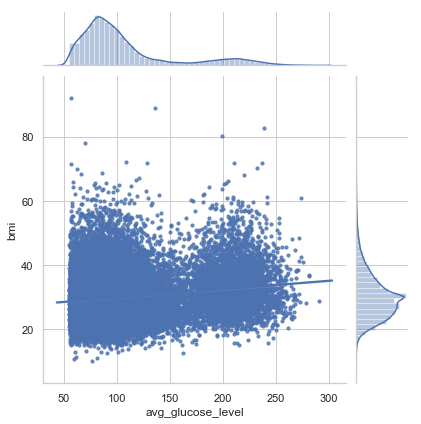

In [68]:
#Visualize the co-relation between bmi and smoking status

#Create a new dataframe containing only pH and fixed acidity columns to visualize their co-relations
bmi_smoking_status = data[['bmi', 'avg_glucose_level']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="avg_glucose_level", y="bmi", data=bmi_smoking_status, height=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

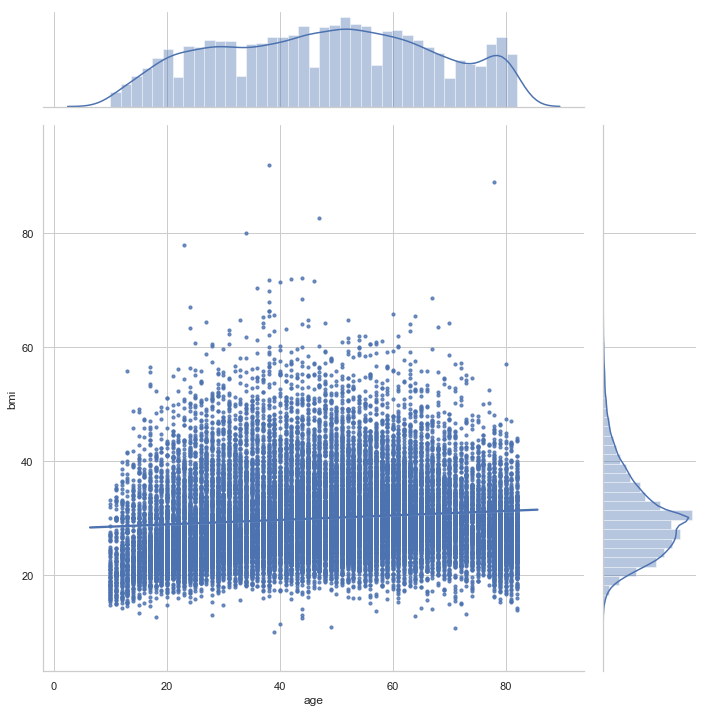

In [69]:
#Visualize the co-relation between bmi and smoking status

#Create a new dataframe containing only pH and fixed acidity columns to visualize their co-relations
bmi_smoking_status = data[['bmi', 'age']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="age", y="bmi", data=bmi_smoking_status, height=10)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

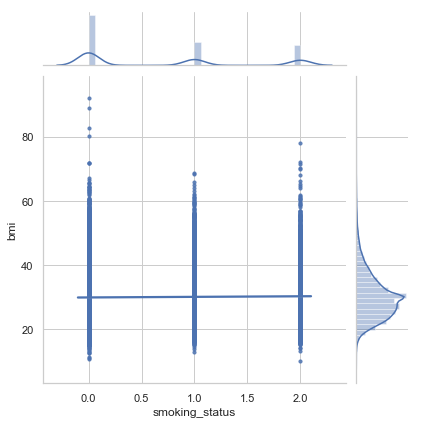

In [70]:
#Visualize the co-relation between bmi and smoking status

#Create a new dataframe containing only pH and fixed acidity columns to visualize their co-relations
bmi_smoking_status = data[['bmi', 'smoking_status']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="smoking_status", y="bmi", data=bmi_smoking_status, height=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

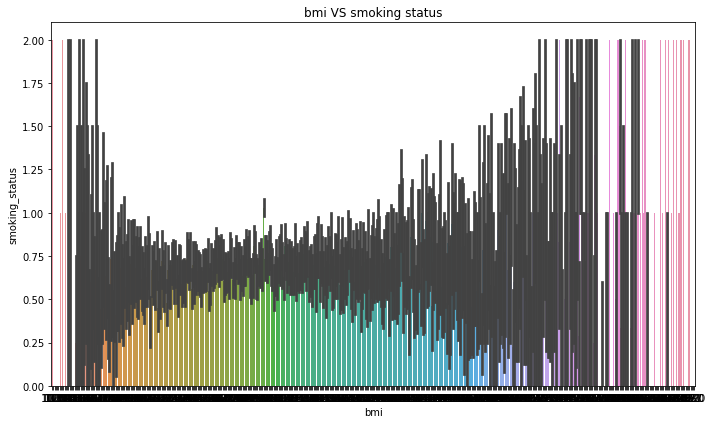

<Figure size 432x288 with 0 Axes>

In [24]:
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='bmi', y='smoking_status', data=bmi_smoking_status, ax=axs)
plt.title('bmi VS smoking status')

plt.tight_layout()
plt.show()
plt.gcf().clear()

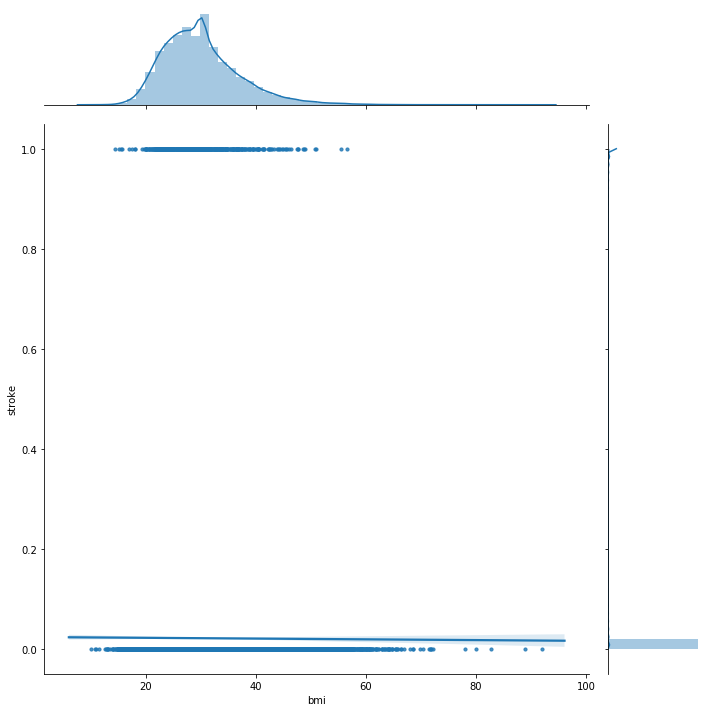

In [27]:
quality_alcohol = data[['bmi', 'stroke']]

g = sns.JointGrid(x="bmi", y="stroke", data=quality_alcohol, height=10)
g = g.plot_joint(sns.regplot, scatter_kws={"s": 10})
g = g.plot_marginals(sns.distplot)

In [71]:
x = data.drop('stroke', 1)
y = data['stroke']
# Import train_test_split
from sklearn.model_selection import train_test_split
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, 
 y, 
 test_size = 0.2, 
 random_state = 0)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 24086 samples.
Testing set has 6022 samples.


In [72]:
# Import two classification metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict_evaluate(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: quality training set
       - X_test: features testing set
       - y_test: quality testing set
    '''
    
    results = {}
    
    """
    Fit/train the learner to the training data using slicing with 'sample_size' 
    using .fit(training_features[:], training_labels[:])
    """
    start = time() # Get start time of training
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size]) #Train the model
    end = time() # Get end time of training
    
    # Calculate the training time
    results['train_time'] = end - start
    
    """
    Get the predictions on the first 300 training samples(X_train), 
    and also predictions on the test set(X_test) using .predict()
    """
    start = time() # Get start time
    predictions_train = learner.predict(X_train[:300])
    predictions_test = learner.predict(X_test)
    
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F1-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5, average='micro')
        
    # Compute F1-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5, average='micro')
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [88]:

from IPython import get_ipython

get_ipython().run_line_magic('matplotlib', 'inline')

###########################################

import matplotlib

import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

import matplotlib.cm as cm

import seaborn as sns

import numpy as np

import pandas as pd

from time import time

from sklearn.metrics import f1_score, accuracy_score



def visualize_classification_performance(results):

    """

    Visualization code to display results of various learners.

    

    inputs:

      - results: a list of dictionaries of the statistic results from 'train_predict_evaluate()'

    """

  

    # Create figure

    sns.set()

    sns.set_style("whitegrid")

    fig, ax = plt.subplots(2, 3, figsize = (11,7))

    # print("VERSION:")

    # print(matplotlib.__version__)

    # Constants

    bar_width = 0.3

    colors = ["#e55547", "#4e6e8e", "#2ecc71"]

    

    # Super loop to plot four panels of data

    for k, learner in enumerate(results.keys()):

        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):

            for i in np.arange(3):

                

                # Creative plot code

                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])

                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])

                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])

                ax[j//3, j%3].set_xlabel("Training Set Size")

                ax[j//3, j%3].set_xlim((-0.1, 3.0))

    

    # Add unique y-labels

    ax[0, 0].set_ylabel("Time (in seconds)")

    ax[0, 1].set_ylabel("Accuracy Score")

    ax[0, 2].set_ylabel("F-score")

    ax[1, 0].set_ylabel("Time (in seconds)")

    ax[1, 1].set_ylabel("Accuracy Score")

    ax[1, 2].set_ylabel("F-score")

    

    # Add titles

    ax[0, 0].set_title("Model Training")

    ax[0, 1].set_title("Accuracy Score on Training Subset")

    ax[0, 2].set_title("F-score on Training Subset")

    ax[1, 0].set_title("Model Predicting")

    ax[1, 1].set_title("Accuracy Score on Testing Set")

    ax[1, 2].set_title("F-score on Testing Set")

    

    # Add horizontal lines for naive predictors

    ax[0, 1].axhline(y = 1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')

    ax[1, 1].axhline(y = 1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')

    ax[0, 2].axhline(y = 1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')

    ax[1, 2].axhline(y = 1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')

    

    # Set y-limits for score panels

    ax[0, 1].set_ylim((0, 1))

    ax[0, 2].set_ylim((0, 1))

    ax[1, 1].set_ylim((0, 1))

    ax[1, 2].set_ylim((0, 1))



    # Create patches for the legend

    patches = []

    for i, learner in enumerate(results.keys()):

        patches.append(mpatches.Patch(color = colors[i], label = learner))

    plt.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \

               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')

    

    # Aesthetics

    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)

    plt.tight_layout(pad=1, w_pad=6, h_pad=15.0)

    plt.show()

In [6]:
# Import any three supervised learning classification models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)
from xgboost import XGBClassifier


# Import supplementary visualization code visuals.py from project root folder
import visuals as vs

# Pretty display for notebooks
%matplotlib inline
#from sklearn.linear_model import LogisticRegression
# Initialize the three models
# clf_A = XGBClassifier()
clf_A = LogisticRegression()
clf_B = DecisionTreeClassifier(max_depth=None, random_state=None)
clf_C = RandomForestClassifier(max_depth=None, random_state=None)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100
# HINT: samples_1 is 1% of samples_100
samples_100 = len(y_train)
samples_10 = int(len(y_train)*10/100)
samples_1 = int(len(y_train)*1/100)
# Collect results on the learners
results = {}


for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict_evaluate(clf, samples, X_train, y_train, X_test, y_test)
        
        
print(results)
# Run metrics visualization for the three supervised learning models chosen
visualize_classification_performance(results)

ImportError: DLL load failed: The specified module could not be found.